In [1]:
import pandas as pd
from fractions import Fraction
from empiricaldist import Pmf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [3]:
def make_binomial(n, p):
    dist = Pmf(1, np.arange(0, n+1))
    dist *= binom.pmf(dist.qs, n, p)
    dist.normalize()
    return dist

def update_binomial(pmf, data):
    """Update pmf using the binomial distribution."""
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [5]:
hypos = np.linspace(0, 1, 101)
pmf = Pmf(1, hypos)
data = 140, 250

update_binomial(pmf, data)

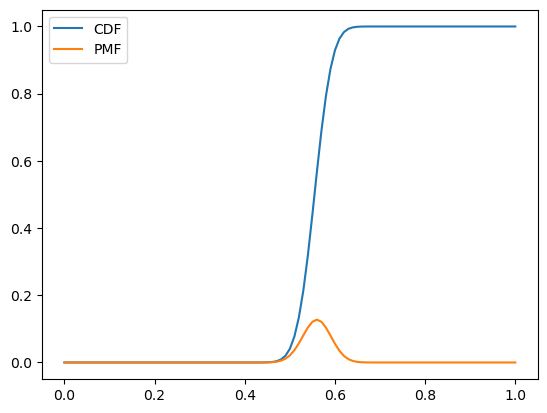

In [8]:
cumulative = pmf.cumsum()

cumulative.plot(label='CDF')
pmf.plot(label='PMF')

plt.legend();

In [9]:
from scipy.interpolate import interp1d

ps = cumulative.values
qs = cumulative.index

interp = interp1d(ps, qs)
interp(0.95)

array(0.60603433)

In [14]:
cdf = pmf.make_cdf()

In [15]:
cdf.quantile(0.95)

array(0.61)

In [17]:
from utils import make_die

die = make_die(6)
dice = [die] * 3

In [18]:
from utils import add_dist_seq

pmf_3d6 = add_dist_seq(dice)

<Axes: >

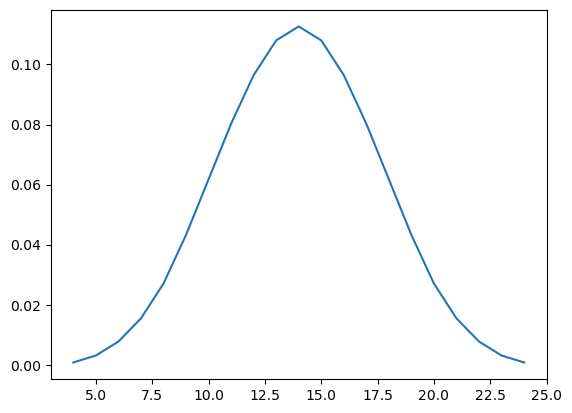

In [20]:
dice4 = [die] * 4
pmf_4d6 = add_dist_seq(dice4)
pmf_4d6.plot()

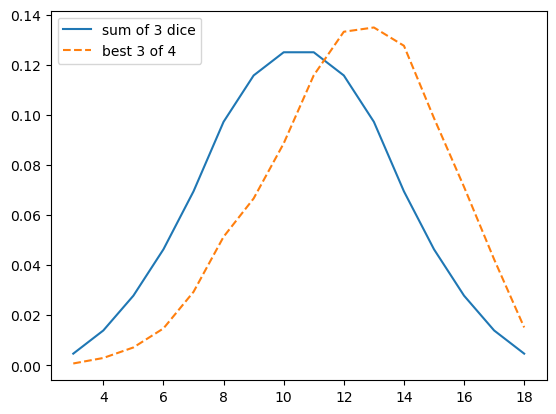

In [24]:
n = 10000
a = np.random.randint(1, 7, size=(n, 4))

a.sort(axis=1)
t = a[:, 1:].sum(axis=1)

pmf_best3 = Pmf.from_seq(t)

pmf_3d6.plot(label='sum of 3 dice')
pmf_best3.plot(label='best 3 of 4', ls='--')

plt.legend();

In [25]:
cdf_best3 = pmf_best3.make_cdf()
cdf_best3

,probs
3,0.0007
4,0.0036
5,0.0107
6,0.0254
7,0.0547
8,0.1060
9,0.1726
10,0.2612
11,0.3770
12,0.5102


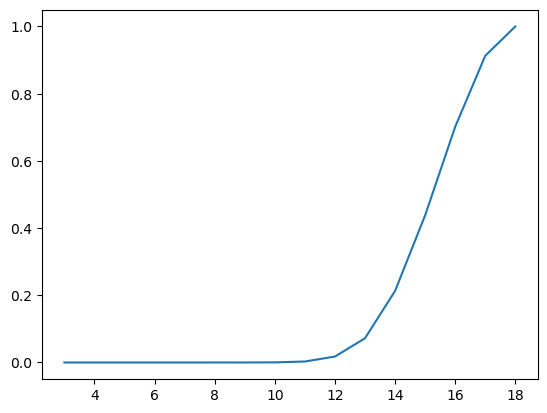

In [26]:
from empiricaldist import Cdf

cdf_max6 = Cdf(cdf_best3**6)
cdf_max6.plot();

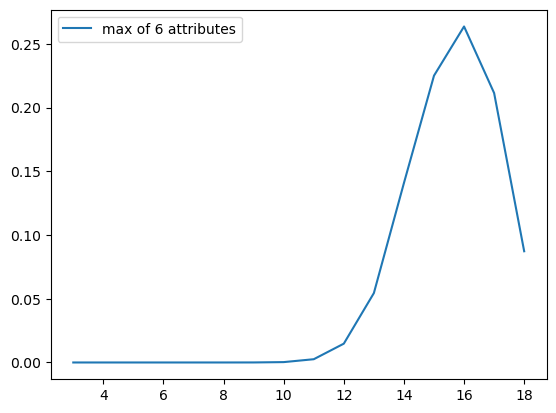

In [27]:
pmf_max6 = cdf_max6.make_pmf()
pmf_max6.plot(label='max of 6 attributes')
plt.legend();

In [28]:
cdf_max_dist6 = cdf_best3.max_dist(6)
cdf_max_dist6

,probs
3,1.176490e-19
4,2.176782e-15
5,1.500730e-12
6,2.685359e-10
7,2.678699e-08
8,1.418519e-06
9,2.643898e-05
10,3.175697e-04
11,2.871099e-03
12,1.763773e-02


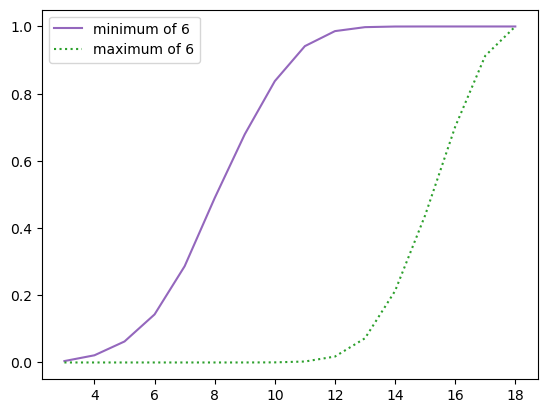

In [30]:
prob_gt = 1 - cdf_best3
prob_gt6 = prob_gt**6

prob_le6 = 1 - prob_gt6
cdf_min6 = Cdf(prob_le6)

cdf_min6.plot(color='C4', label='minimum of 6')
cdf_max6.plot(color='C2', label='maximum of 6', ls=':')
plt.legend();

In [32]:
cdf_min_dist6 = cdf_best3.min_dist(6)

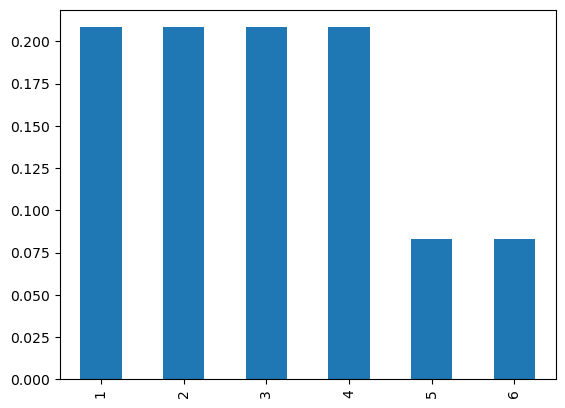

In [33]:
d4 = make_die(4)
d6 = make_die(6)

mix1 = (d4 + d6) / 2
mix1.plot.bar();

In [34]:
hypos = [4,6,8]
counts = [1,2,3]
pmf_dice = Pmf(counts, hypos)
pmf_dice.normalize()
pmf_dice

,probs
4,0.166667
6,0.333333
8,0.500000


In [36]:
dice = [make_die(sides) for sides in hypos]
pd.DataFrame(dice)

,1,2,3,4,5,6,7,8
0,0.250000,0.250000,0.250000,0.250000,NaN,NaN,NaN,NaN
1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,NaN,NaN
2,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125,0.125


In [38]:
df = pd.DataFrame(dice).fillna(0).transpose()
df

,0,1,2
1,0.25,0.166667,0.125
2,0.25,0.166667,0.125
3,0.25,0.166667,0.125
4,0.25,0.166667,0.125
5,0.00,0.166667,0.125
6,0.00,0.166667,0.125
7,0.00,0.000000,0.125
8,0.00,0.000000,0.125


In [39]:
df *= pmf_dice.ps
df

,0,1,2
1,0.041667,0.055556,0.0625
2,0.041667,0.055556,0.0625
3,0.041667,0.055556,0.0625
4,0.041667,0.055556,0.0625
5,0.000000,0.055556,0.0625
6,0.000000,0.055556,0.0625
7,0.000000,0.000000,0.0625
8,0.000000,0.000000,0.0625


In [40]:
df.sum(axis=1)

1    0.159722
2    0.159722
3    0.159722
4    0.159722
5    0.118056
6    0.118056
7    0.062500
8    0.062500
dtype: float64

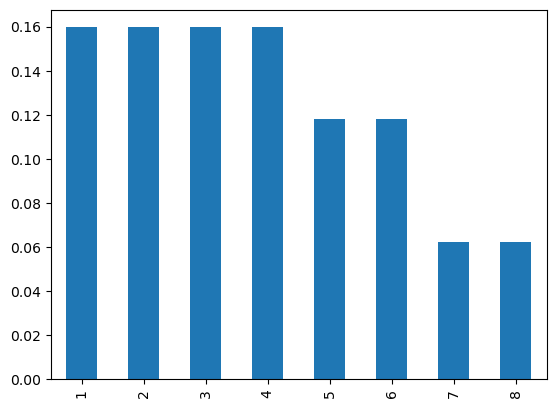

In [41]:
def make_mixture(pmf, pmf_seq):
    """Make a mixture of distributions."""
    df = pd.DataFrame(pmf_seq).fillna(0).transpose()
    df *= np.array(pmf)
    total = df.sum(axis=1)
    return Pmf(total)

mix = make_mixture(pmf_dice, dice)

mix.plot.bar();